# Fake News Detection With Passive Aggressive Algorithm

### A Fake News here it's a news that contains sarcasm (classified sarcastic)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [2]:
df_raw = pd.read_json('data/Sarcasm_Headlines_Dataset.json', lines=True)
df_raw.shape

(26709, 3)

In [3]:
df_raw.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [4]:
df = df_raw.iloc[:,1:]
df

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0
...,...,...
26704,american politics in moral free-fall,0
26705,america's best 20 hikes,0
26706,reparations and obama,0
26707,israeli ban targeting boycott supporters raise...,0


In [5]:
# Split the dataset (training ans testing dataset)
x_train, x_test, y_train, y_test = train_test_split(df.headline, df.is_sarcastic, test_size=0.2, random_state=4)

In [6]:
# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

In [7]:
# Initialize the Passive Aggressive Classifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [8]:
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 76.83%


In [12]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[2472,  590],
       [ 648, 1632]], dtype=int64)

In [10]:
true_neg, false_pos, false_neg, true_pos = conf_matrix.ravel()

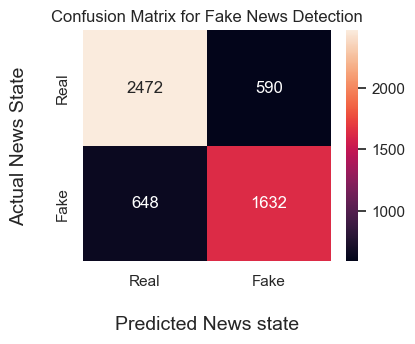

In [18]:
plt.figure(figsize=(4,3), dpi=100)
sns.set(font_scale=1)

ax = sns.heatmap(conf_matrix, annot=True, fmt='d')
ax.set_xlabel("Predicted News state", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Real', 'Fake'])

ax.set_ylabel("Actual News State", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Real', 'Fake'])

ax.set_title("Confusion Matrix for Fake News Detection")

plt.show()
